In [1]:
import torch
import matplotlib.pyplot as plt 
import numpy as np 
import random

### 生成数据

In [57]:
true_w = [2,-3.5]
true_b = 5
num_inputs = 2
num_samples = 1000
# features = torch.from_numpy(np.random.normal(0,1,(num_samples,num_inputs)))
features = torch.randn(num_samples,num_inputs,dtype=torch.float32)
labels = true_w[0]*features[:,0] + true_w[1]*features[:,1]+true_b
labels += torch.tensor(np.random.normal(0,0.1,size=labels.size()),dtype=torch.float32)


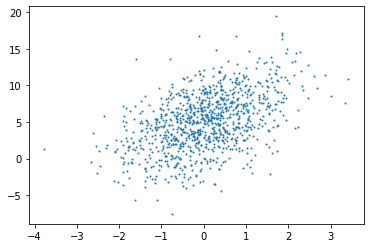

In [58]:
plt.scatter(features[:,0].numpy(),labels.numpy(),1)

### 读取数据

In [59]:
def data_iter(batch_size,features,labels):
    num_samples = len(features)
    index = list(range(0,num_samples))
    random.shuffle(index)
    for i in range(0,num_samples,batch_size):
        j = torch.LongTensor(index[i:min(i+batch_size,num_samples)])
        yield features.index_select(0,j),labels.index_select(0,j)

In [60]:
for x,y in data_iter(batch_size=10,features=features,labels=labels):
    print(x.shape,y.shape)
    print(x,y)
    break

torch.Size([10, 2]) torch.Size([10])
tensor([[-0.5710,  1.1064],
        [-0.3546,  0.3856],
        [ 0.4016, -1.0365],
        [ 0.4058, -1.2283],
        [ 0.0815,  1.5215],
        [ 1.3195,  0.2920],
        [-1.7991,  0.0909],
        [ 1.5998, -0.7585],
        [-0.2983, -0.3683],
        [ 1.2761,  0.9621]]) tensor([-6.4624e-03,  2.7733e+00,  9.4171e+00,  9.9324e+00, -2.5446e-01,
         6.6078e+00,  1.1253e+00,  1.0983e+01,  5.7542e+00,  4.1328e+00])


### 初始化模型参数

In [61]:
W = torch.tensor(np.random.normal(0,1,(num_inputs,1)),dtype=torch.float32)
b = torch.zeros(1,dtype=torch.float32)
W.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)

tensor([0.], requires_grad=True)

### 定义模型

In [62]:
def linear_reg(X,W,b):
    return torch.mm(X,W) + b

### 定义损失函数

In [63]:
def square_loss(y_hat,y):
    return (y_hat-y.view(y_hat.size()))**2/2

### 定义优化函数

In [64]:
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

### 训练


In [74]:
epoch = 10
lr = 0.01
batch_size = 32
net = linear_reg
loss = square_loss
for i in range(epoch):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,W,b),y).sum()
        l.backward()
        sgd([W,b],lr,batch_size)
        W.grad.data.zero_()
        b.grad.data.zero_()
    tran_loss = loss(net(features,W,b),labels)
    print('epoch %d, loss :%f'%(i+1,tran_loss.mean()))


epoch 1, loss :0.004683
epoch 2, loss :0.004683
epoch 3, loss :0.004683
epoch 4, loss :0.004683
epoch 5, loss :0.004683
epoch 6, loss :0.004683
epoch 7, loss :0.004683
epoch 8, loss :0.004683
epoch 9, loss :0.004683
epoch 10, loss :0.004683


In [75]:
print(true_w,'\n',W)
print(true_b,'\n',b)

[2, -3.5] 
 tensor([[ 1.9975],
        [-3.5040]], requires_grad=True)
5 
 tensor([4.9999], requires_grad=True)
